## 2) The data

### (a) Clear overview of your data

In this section we inspect the data in order to get a clear understanding of the variables. This is important to decide which variables and observations can be later used in the modelling part. In particular the following points are adressed for all of the three datasets:

1. What are the variables (*I. Variables*)?
2. How are the variables distributed (*II. Distribution*)?
3. How do we deal with missing values, implausible values and outliers (*III. Cleaning*)

The actual cleaning is done in *IV. Implementation*.

<!--- The points 1), 2) and 3) are investigated for the three datasets airbnb, housing, and crime.--->

#### Airbnb data

Airbnb data as of 2018/12/07 can be downloaded from http://insideairbnb.com/get-the-data.html. This is the main dataset and the goal is to predict the airbnb price. Let's inspect this data. The function ``prepro_dataset()``cleans the variable ``smart_location``so that values from the other datasets can be merged to the airbnb dataset later. 

In [6]:
dirname = os.path.abspath('')
filename = os.path.join(dirname, "Airbnb/2018_12_07/listings.csv")

# import the data
airbnb_df = air.import_data(filename)

# preprocessing the dataset
# airbnb prices as float, cleaning smart_location to fit to the housing_market dataset
airbnb_prepro_df = air.prepro_dataset(airbnb_df, restrict=None)

airbnb_df.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,9835,https://www.airbnb.com/rooms/9835,20181207034809,2018-12-07,Beautiful Room & House,NaN,"House: Clean, New, Modern, Quite, Safe. 10Km f...","House: Clean, New, Modern, Quite, Safe. 10Km f...",none,Very safe! Family oriented. Older age group.,...,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,0.04


In [7]:
airbnb_df.shape # (22895, 96)

(22895, 96)

**I. Variables**

The airbnb dataset contains 96 variables. The entries of the variable ``listing_url`` are unique. The latter implies that none of the airbnb accommodation is listed twice. The data is scraped either on the 7th or 8th of December 2018.

In [8]:
# Number of features
len(airbnb_df.columns) # 96 including id, listing_url, scrape_id, last_scraped etc.

96

In [9]:
len(airbnb_df.loc[:, 'listing_url'].unique()) # 22895
airbnb_df.loc[:, 'last_scraped'].unique(); # array(['2018-12-07', '2018-12-08'], dtype=object)

**Descritption of the variables**

Next, a description of the variables is provided.

**id:** the id. <br>
**listing_url:** the url. <br>
**scrape_id:** scrape id. <br>
**last_scraped:** the date when the data was scraped. <br>
**name:** name or description of the apartment. <br>
**summary:** description of the accommodation. <br>
**space:** description of the space. <br>
**description:** another description. <br>
**experiences_offered:** no information, is always 'none'. <br>
**neighborhood_overview:** description of the neighbourhood. <br>
**notes:** additional information. <br>
**transit:** information about the nearest bus or tram stations. <br>
**access:** access to kitchen, bathrooms, wifi, pools etc. <br>
**interaction:** description of the social interactions between guests and host. <br>
**house_rules:** the house rules. <br>
**thumbnail_url:** no information, is always NaN. <br>
**medium_url:** no information, is always NaN. <br>
**picture_url:** the url to the picture. <br>
**xl_picture_url:** no information, is alwas nan. <br>
**host_id:** the host id. <br>
**host_url:** the url to the host on airbnb.com. <br>
**host_name:** the name of the host. <br>
**host_since:** date since the host started to be host. <br>
**host_location:** location of the host. <br>
**host_about:** information about the hosts. <br>
**host_response_time:** host's time to response. <br>
**host_response_rate:** the response rate of the host. <br>
**host_acceptance_rate:** no information, is always NaN. <br>
**host_is_superhost:** whether the host is superhost or not. <br>
**host_thumbnail_url:** host's thumbnail url. <br>
**host_picture_url:** host's picture url. <br>
**host_neighbourhood:** host's neighbourhood. <br>
**host_listings_count:** number of listings of the host. <br>
**host_total_listings_count:** number of listings in total of the host, not difference to 'host_listings_count'. <br>
**host_verifications:** means to verify the host e.g. email, phone, review, government_id. <br>
**host_has_profile_pic:** whether the host has a profile pic or not. <br>
**host_identity_verified:** whether the host's identity is verified or not. <br>
**street:** information about the location of the accommodation, no street names, but rather neighbourhoods. <br>
**neighbourhood:** the neighbourhood where the accommodation is located. <br>
**neighbourhood_cleansed:** the neighbourhood. <br>
**neighbourhood_group_cleansed:** no information, is always NaN. <br>
**city:** the name of the city or suburb. <br>
**state:** the state. <br>
**zipcode:** the zip code. <br>
**market:** meaning unclear. <br>
**smart_location:** the neighbourhood or suburb. <br>
**country_code:** the country code, always 'AU' for Australia. <br>
**country:** the name of the country, always 'Australia'. <br>
**latitude:** the latitude. <br>
**longitude:** the longitude. <br>
**is_location_exact:** whether the location is exact or not. <br>
**property_type:** whether it is a house, apartment, townhouse etc. <br>
**room_type:** whether the entire home/apartment or only a private room is rent. <br>
**accommodates:** number of person the home accommodates. <br>
**bathrooms:** number of bathrooms. <br>
**bedrooms:** number of bedrooms. <br>
**beds:** number of beds. <br>
**bed_type:** the bed type e.g. real bed, futon, pull-out sofa etc. <br>
**amenities:** the amenities. <br>
**square_feet:** the size of the accommodation. <br>
**price:** the price in (AUS) dollar. <br>
**weekly_price:** the weekly price in (AUS) dollar. <br>
**monthly_price:** the monthly price in (AUS) dollar. <br>
**security_deposit:** the security deposit in (AUS) dollar.<br>
**cleaning_fee:** the cleaning fee in (AUS) dollar. <br> 
**guests_included:** number of guests included. <br>
**extra_people:** how much extra people cost. <br>
**minimum_nights:** the minimum number of nights to stay. <br>
**maximum_nights:** the maximum number of nights to stay. <br>
**calendar_updated:** the last time the calendar was updated. <br>
**has_availability:** no information, always 't'. <br>
**availability_30:** the number of days the accommodation is available in the next 30 days. <br>
**availability_60:** the number of days the accommodation is available in the next 60 days. <br>
**availability_90:** the number of days the accommodation is available in the next 90 days. <br>
**availability_365:** the number of days the accommodation is available in the next 365 days. <br>
**calendar_last_scraped:** the date when the calendar was scraped for the last time. <br>
**number_of_reviews:** the number of reviews. <br>
**first_review:** the date of the first review. <br>
**last_review:** the date of the last review. <br>
**review_scores_rating:** the rating of the review score. <br>
**review_scores_accuracy:** the accuracy of the presentation of the space. <br>
**review_scores_cleanliness:** the review score for the cleanliness. <br> 
**review_scores_checkin:** the review score for the check-in. <br>
**review_scores_communication:** the review score for the communication. <br>
**review_scores_location:** the review score for the location. <br>
**review_scores_value:** the review score for the price. <br>
**requires_license:** no information, is always 'f'. <br>
**license:** no information, is always NaN. <br>
**jurisdiction_names:** noinformation, is always nan. <br>
**instant_bookable:** whether the accommodation is instantly bookable or not. <br>
**is_business_travel_ready:** no information, is always 'f'. <br>
**cancellation_policy:** information about the cancellation policy. <br>
**require_guest_profile_picture:** whether a guest profile picture is required or not. <br>
**require_guest_phone_verification:** whether a guest phone verification is required or not. <br>
**calculated_host_listings_count:** similar to 'host_listings_count' or 'host_total_listings_count'. <br>
**reviews_per_month:** number of reviews per month.

**Numerical and categorical variables**

The variables are now classified as *numerical*, *categorical* or *messy textual variables*. Dates are classified as numeric values. 

**numerical:** last_scraped, host_since, host_response_rate, host_listings_count, host_total_listings_count, latitude, longitude, accommodates, bathrooms, bedrooms, beds, square_feet, price, weekly_price, monthly_price, security_deposit, cleaning_fee, guests_included, extra_people, minimum_nights, maximum_nights, availability_30, availability_60, availability_90, availability_365, calendar_last_scraped, number_of_reviews, first_review, last_review, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value, calculated_host_listings_count, reviews_per_month

**categorical variables:** host_is_superhost, host_neighbourhood, host_has_profile_pic, host_identity_verified, street, neighbourhood, neighbourhood_cleansed, city, state, zipcode, smart_location, is_location_exact, property_type, room_type,
bed_type, instant_bookable, cancellation_policy, require_guest_profile_picture, require_guest_phone_verification

**messy textual data:**
name, summary, space, description, neighborhood_overview, notes, transit, access, interaction, house_rules, host_about, amenities, calendar_updated

In [10]:
airbnb_numeric = ['price', 'weekly_price', 'monthly_price', 'security_deposit',
                 'cleaning_fee', 'extra_people',
                 'last_scraped', 'calendar_last_scraped', 'first_review', 
                 'last_review',
                 'host_response_rate', 
                 'host_listings_count', 'host_total_listings_count',
                 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms',
                 'beds', 'square_feet', 'guests_included', 'minimum_nights', 
                 'maximum_nights', 'availability_30', 'availability_60',
                 'availability_90', 'availability_365', 'number_of_reviews',
                 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                 'review_scores_checkin', 'review_scores_communication', 
                 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count',
                 'reviews_per_month']
airbnb_categorical = ['host_is_superhost', 'host_neighbourhood', 'host_has_profile_pic', 
                      'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 
                      'city', 'state', 'zipcode', 'smart_location', 'is_location_exact', 'property_type', 
                      'room_type', 'bed_type', 'instant_bookable', 'cancellation_policy', 
                      'require_guest_profile_picture', 'require_guest_phone_verification']

**II. Distribution**

**Ranges of the numerical variables**

Next, the ranges of the numeric variables are inspected. We see that some of the variables have a huge range. Some of these observations might be outliers and should be removed for modelling becaused they can negatively influence the model estimation.

In [11]:
columns = ['Air_' + col_name for col_name in airbnb_numeric]
airbnb_range = pd.concat([airbnb_prepro_df.loc[:, columns].apply(np.min, axis=0),
                          airbnb_prepro_df.loc[:, columns].apply(np.max, axis=0)], axis=1)
airbnb_range.columns = ['min', 'max']
airbnb_range

,min,max
Air_price,0,12624
Air_weekly_price,91,11536
Air_monthly_price,400,54258
Air_security_deposit,0,6950
Air_cleaning_fee,0,867
Air_extra_people,0,421
Air_last_scraped,2018-12-07 00:00:00,2018-12-08 00:00:00
Air_calendar_last_scraped,2018-12-07 00:00:00,2018-12-08 00:00:00
Air_first_review,2010-08-04 00:00:00,2018-12-07 00:00:00
Air_last_review,2013-01-05 00:00:00,2018-12-07 00:00:00


**Values of categorical variables**

Next, it is checked what categories the categorical variables can take. We observe  for example that:

- For 17'248 observations the location measured as longitude and latitude is exact, and for 5'647 not. <br>
- The room type is in 14'379 cases an entire home or apartment, in 8'116 cases a private room and in 400 cases a shared room. <br>
- The bed type is almost always a bed (22'730) and only in a few cases a pull-out sofa (70), a futon (69) an airbed (17) and a couch (9).

It is clear that even if it were the case that the airbnb price for example apartments with pull-out sofa are substantially cheaper than apartments with a pull-out sofa, or a futon, the effects on the overall prediction is negligeble because the bed type is in 99% a real bed. 

In [12]:
# Previously cell 8
columns = ['Air_' + col_name for col_name in airbnb_categorical]

for name in columns:
    print(name)
    print("-------------------------------------------")
    print(airbnb_prepro_df.loc[:, name].value_counts())
    print("")

Air_host_is_superhost
-------------------------------------------
f    17519
t     5373
Name: Air_host_is_superhost, dtype: int64

Air_host_neighbourhood
-------------------------------------------
Central Business District         3537
Southbank                         1009
St Kilda                           976
South Yarra                        834
Brunswick                          625
Docklands                          517
Richmond                           506
Carlton                            459
Prahran/Windsor                    286
Northcote                          280
Abbotsford                         270
Port Melbourne                     270
East Melbourne                     251
South Melbourne                    245
Fitzroy                            237
Elwood                             230
North Melbourne                    230
Caulfield                          225
Fitzroy North                      203
Hawthorn                           199
Collingwood           

**Distribution of the airbnb price and other variables**

The distribution of the variables are shown below.

*Continuous variables*

From the boxplots and the density plots we observe that many of the continuous variables contain outliers and have a skewed distribution.

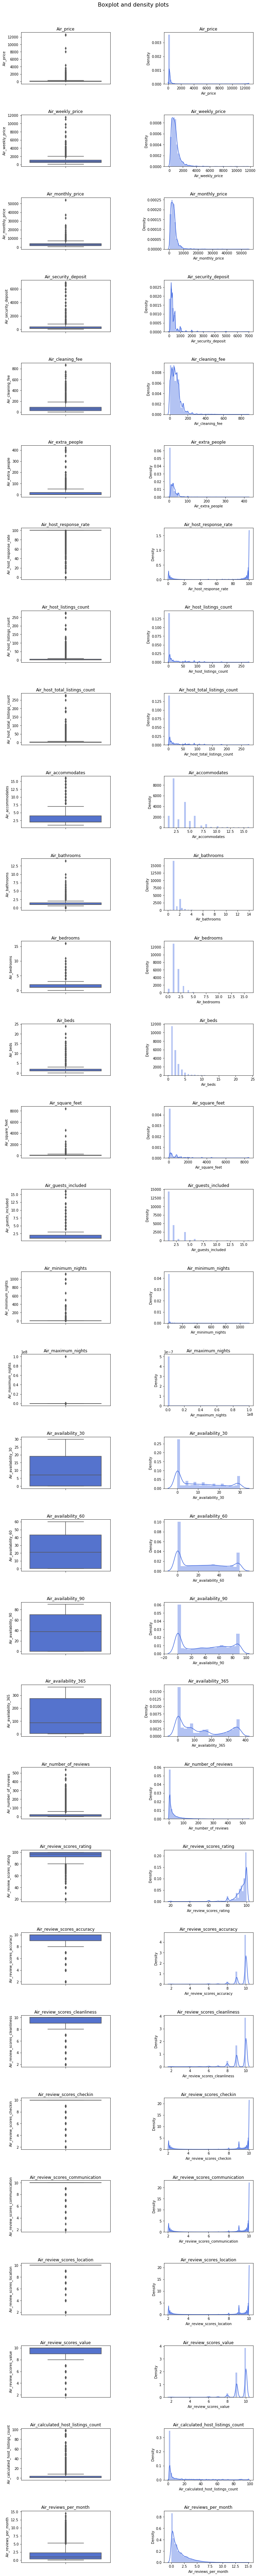

In [13]:
variables = airbnb_numeric.copy() 
variables = ['Air_' + v for v in variables if v not in ('last_scraped', 'calendar_last_scraped', 'first_review', 
                 'last_review', 'latitude', 'longitude')]
            
fig, axes = plt.subplots(nrows=len(variables), ncols=2, figsize=(12,120))

# 'top' to position the suptitle (https://stackoverflow.com/questions/8248467/
# matplotlib-tight-layout-doesnt-take-into-account-figure-suptitle)
plt.subplots_adjust(wspace=0.6, hspace=0.6, top=0.97) 
#https://stackoverflow.com/questions/7066121/how-to-set-a-single-main-title-above-all-the-subplots-with-pyplot
fig.suptitle("Boxplot and density plots", fontsize=16)   

for i,var in enumerate(variables):
    
    data = airbnb_prepro_df.loc[:, var].dropna()
    sns.boxplot(y=data, ax=axes[i,0], color=col1)
    axes[i,0].set_title(var)
    axes[i,0].set_ylabel(var)
    if var in ['Air_accommodates', 'Air_bathrooms', 'Air_bedrooms', 'Air_beds', 'Air_guests_included']:
        plot_kde = False
    else:
        plot_kde = True
    sns.distplot(data, ax=axes[i,1], kde=plot_kde, color=col1)
    axes[i,1].set_title(var)
    axes[i,1].set_ylabel("Density")

The airbnb price is skewed to the right. In such a situation a log-transformation could help to obtain a distribution with a 'nicer', i.e. more normal shape, which is done in the following.

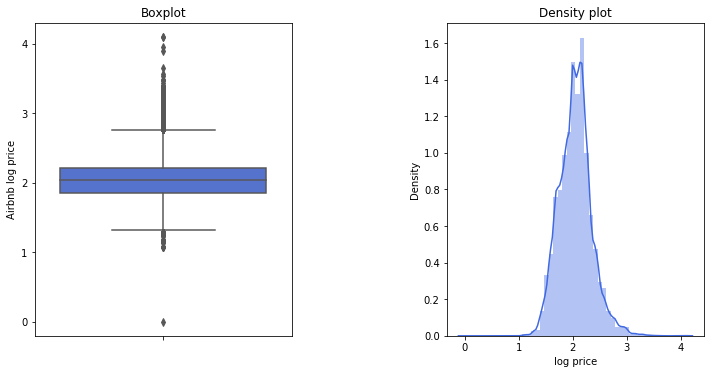

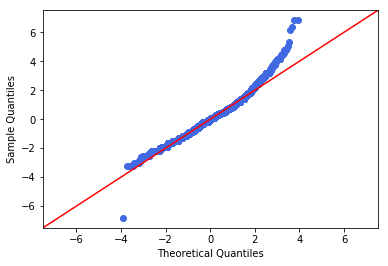

In [14]:
# modified
fig, axes = plt.subplots(1, 2, figsize=(12,6))
plt.subplots_adjust(wspace=0.6, top=0.85) 

# Boxplot
sns.boxplot(y=np.log10(airbnb_prepro_df.Air_price), ax=axes[0], color=col1)
axes[0].set_title("Boxplot")
axes[0].set_ylabel('Airbnb log price');

# Density plot
tmp = airbnb_prepro_df.loc[airbnb_prepro_df.Air_price > 0, 'Air_price']
sns.distplot(np.log10(tmp), color=col1)
axes[1].set_title("Density plot")
axes[1].set_ylabel("Density")
axes[1].set_xlabel("log price")

# QQ plot
tmp = airbnb_prepro_df.loc[airbnb_prepro_df.Air_price > 0, 'Air_price']
tmp = np.log10(tmp)
stdized = (tmp - np.mean(tmp)) / np.std(tmp)
sm.qqplot(stdized, line='45', color=col1);

*Categorical variables*

Next, we take a look at the distribution of some categorical variables. We observe that some of the categories have only a few observations. As already discussed this above these variables are not so helpful for predicting airbnb prices.

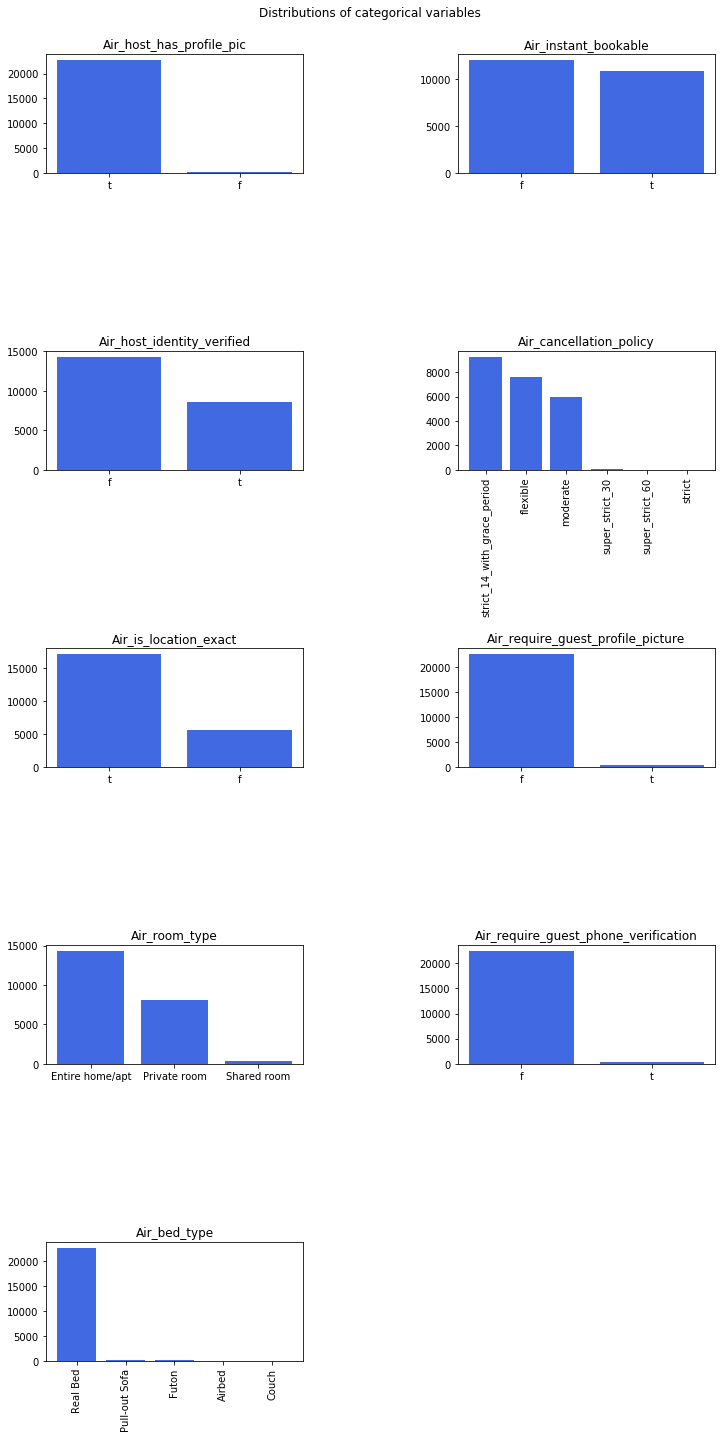

In [15]:
tmp = ['Air_host_has_profile_pic', 'Air_host_identity_verified', 'Air_is_location_exact', 'Air_room_type', 'Air_bed_type', 
'Air_instant_bookable', 'Air_cancellation_policy', 'Air_require_guest_profile_picture', 'Air_require_guest_phone_verification']
fig, axes = plt.subplots(int(np.ceil(len(tmp)/2)),2, figsize=(12, 22))
plt.suptitle("Distributions of categorical variables")
plt.subplots_adjust(wspace=0.6, hspace=1.5, top=0.95) 
for i in range(len(tmp)):
    if i < len(tmp)/2:
        h = airbnb_prepro_df.loc[:, tmp[i]].value_counts().to_list()
        names = airbnb_prepro_df.loc[:, tmp[i]].value_counts().index.to_list()
        axes[i,0].bar(x=range(len(h)), height=h, color=col1)
        axes[i,0].set_xticks(range(len(h)))
        if tmp[i] in ('Air_bed_type', 'Air_cancellation_policy'):
            r = 90
        else:
            r = 0
        axes[i,0].set_xticklabels(names, rotation=r)
        axes[i,0].set_title(tmp[i])
    else:
        j = i - int(np.ceil(len(tmp)/2))
        h = airbnb_prepro_df.loc[:, tmp[i]].value_counts().to_list()
        names = airbnb_prepro_df.loc[:, tmp[i]].value_counts().index.to_list()
        axes[j,1].bar(x=range(len(h)), height=h, color=col1)
        axes[j,1].set_xticks(range(len(h)))
        if tmp[i] in ('Air_bed_type', 'Air_cancellation_policy'):
            r = 90
        else:
            r = 0
        axes[j,1].set_xticklabels(names, rotation=r)
        axes[j,1].set_title(tmp[i])
axes[4,1].remove()

**III. Cleaning**

We have seen so far that a log-transformation can make the distribution 'nicer'. However, the log-price and the other variables still contain missing or implausible values and outliers. This is the topic of this section.

**Missing values**

Let's take a look at the missing values. The worst variable regarding missing values is `Air_square_feet` which is missing for every observation.

In [16]:
columns = ['Air_' + el for el in airbnb_numeric + airbnb_categorical if el not in 
           ['weekly_price', 'monthly_price']]

# the variable 'smart_location' is used to locate the neighbourhood, so we don't need other location variables.
unimportant_loc_vars = ['Air_city', 'Air_state', 'Air_zipcode']
for v in unimportant_loc_vars:
    columns.remove(v)
    
airbnb_sorted_non_missing = airbnb_prepro_df.loc[:, columns].isnull().sum().sort_values(ascending=True)
airbnb_sorted_non_missing

Air_price                                   0
Air_availability_30                         0
Air_availability_60                         0
Air_availability_90                         0
Air_availability_365                        0
Air_require_guest_profile_picture           0
Air_calculated_host_listings_count          0
Air_street                                  0
Air_neighbourhood_cleansed                  0
Air_smart_location                          0
Air_is_location_exact                       0
Air_property_type                           0
Air_room_type                               0
Air_bed_type                                0
Air_instant_bookable                        0
Air_cancellation_policy                     0
Air_maximum_nights                          0
Air_minimum_nights                          0
Air_number_of_reviews                       0
Air_require_guest_phone_verification        0
Air_guests_included                         0
Air_calendar_last_scraped         

*Exact location*

Airbnb provides the option to share the exact location of the accommodation. More than 75% of the hosts choose this option. The variable does not contain missing values. Exact location can be preferred when combining datasets based on latitude and longitude. We do not distinguish between exact and not exact location in order to have more observations.

Source:
https://community.withairbnb.com/t5/Hosting/Showing-exact-location-to-guests/td-p/630767

In [17]:
airbnb_prepro_df.Air_is_location_exact.value_counts()

t    17248
f     5647
Name: Air_is_location_exact, dtype: int64

*Potential model size*

How does the number of non-missing values evolve with the number of variables considered? To check this the variables are ordered in a decreasing manner according to the number of non-missing values. We observe that the best 35 variables in terms of the number of non-missing values do not substantially decrease the number of observations when considered. Hence, we could use these 35 variables without losing a lot of observations later in a model.

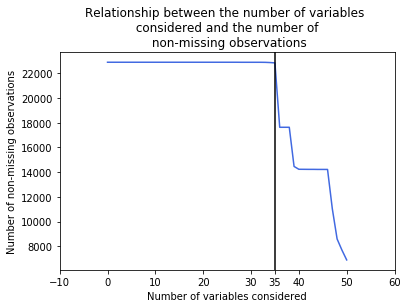

In [18]:
# previously cell 22
non_missing_obs = []

for i,c in enumerate(airbnb_sorted_non_missing.index):
    cols = airbnb_sorted_non_missing.index[:i]
    non_missing_obs.append(airbnb_prepro_df.loc[:, cols].dropna(how='any').shape[0])

plt.plot(non_missing_obs, color=col1)
plt.title("Number of non-missing values in relation \n to the number of variables considered")
plt.axvline(x=len(non_missing_obs)-16, color='black')
plt.xticks(list(plt.xticks()[0]) + [len(non_missing_obs)-16])
plt.ylabel("Number of non-missing observations")
plt.xlabel("Number of variables considered")
plt.title("Relationship between the number of variables \n considered and the number of \n non-missing observations");

**Implausible values**

There are some implausible values. The price is for example zero for 21 observations and there are 7 observations where the price for one night is larger than the price for a week or month. These observations will be excluded later.

In [19]:
airbnb_prepro_df.loc[airbnb_prepro_df.Air_price == 0, ['Air_name', 'Air_price', 'Air_weekly_price', 
                                                       'Air_monthly_price', 'Air_security_deposit', 
                                                       'Air_cleaning_fee', 'Air_extra_people', 
                                                       'Air_minimum_nights']].head(5)

,Air_name,Air_price,Air_weekly_price,Air_monthly_price,Air_security_deposit,Air_cleaning_fee,Air_extra_people,Air_minimum_nights
9875,Loongana Room,0.0,NaN,NaN,0.0,80.0,0.0,1.0
10109,Central Healesville loft apartment,0.0,NaN,NaN,135.0,35.0,0.0,1.0
10962,Ellia Apartments - Doncaster ( LG5 - N ),0.0,NaN,NaN,200.0,75.0,0.0,2.0
10965,Ellia Apartments - Doncaster ( LG6 - N ),0.0,NaN,NaN,200.0,75.0,0.0,2.0
10966,Ellia Apartments - Doncaster ( LG7-N ),0.0,NaN,NaN,200.0,75.0,0.0,2.0


In [20]:
impl_obs = airbnb_prepro_df.loc[(airbnb_prepro_df.Air_price >= airbnb_prepro_df.Air_weekly_price) |
                                (airbnb_prepro_df.Air_price >= airbnb_prepro_df.Air_monthly_price), 
                                ['Air_price', 'Air_weekly_price', 'Air_monthly_price']]
impl_obs

,Air_price,Air_weekly_price,Air_monthly_price
376,500.0,500.0,1800.0
1583,860.0,500.0,2000.0
2331,150.0,150.0,NaN
2584,550.0,NaN,550.0
4672,440.0,280.0,NaN
5168,999.0,290.0,990.0
6704,999.0,599.0,2199.0


**Outliers**

*Numerical variables (continuous or discrete)*

We see that there are only a few accommodations with very high prices above 500 and 1'000 dollar.

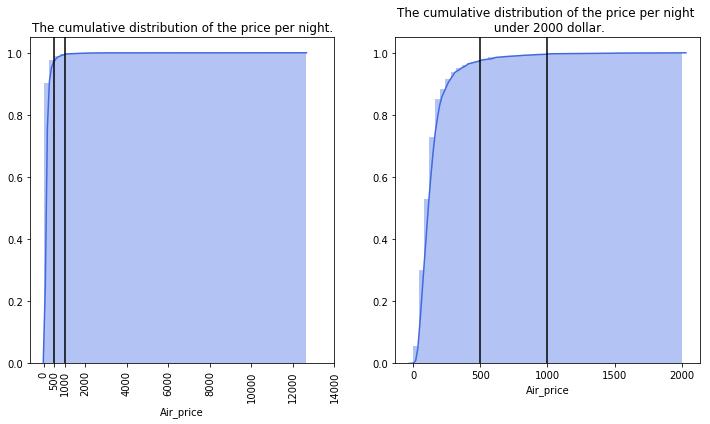

In [21]:
#https://stackoverflow.com/questions/39297523/plot-cdf-cumulative-histogram-using-seaborn-python
fig, axes = plt.subplots(1,2, figsize=(12, 6))

sns.distplot(airbnb_prepro_df.Air_price, hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True),
            ax=axes[0], color=col1)
axes[0].axvline(x=500, color='black')
axes[0].axvline(x=1000, color='black')
ticks = [int(t) for t in list(axes[0].get_xticks()) if t >= 0] # to get rid of negative ticks
axes[0].set_xticks(ticks + [500, 1000]);
axes[0].set_xticklabels(ticks + [500, 1000], rotation=90)
axes[0].set_title('The cumulative distribution of the price per night.')

sns.distplot(airbnb_prepro_df.loc[airbnb_prepro_df.Air_price <= 2000, 'Air_price'], 
                                   hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True),
            ax=axes[1], color=col1)
axes[1].axvline(x=500, color='black')
axes[1].axvline(x=1000, color='black')
axes[1].set_title('The cumulative distribution of the price per night \n under 2000 dollar.');

To detect outliers in a more automatic way and not only restricted to the airbnb price variable, observations are defined as outliers if they lie outside of the interval [Q1 - 1.5\*IQR, Q3 + 1.5\*IQR]. Another approach (not followed here) is to use Z-scores, i.e. to standardize the data so that it has mean zero and a standard deviation of one, and to define observations with e.g |Z-score| > 3 as outliers (https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba).

In [22]:
variables = airbnb_numeric.copy() 
variables = ['Air_' + v for v in variables if v not in ('last_scraped', 'calendar_last_scraped', 'first_review', 
                 'last_review', 'latitude', 'longitude', 'weekly_price', 'monthly_price', 'security_deposit',
                                                       'cleaning_fee', 'square_feet')]

tmp = airbnb_prepro_df.loc[:, variables]

tmp['Air_log_price'] = np.log10(tmp.Air_price)
tmp.drop(columns='Air_price', inplace=True)
quantiles = tmp.quantile([.25, .75])
iqr = quantiles.iloc[1, :] - quantiles.iloc[0, :]
upper_bounds = quantiles.iloc[1, :] + 1.5*iqr
lower_bounds = quantiles.iloc[0, :] - 1.5*iqr
upper_bounds

airbnb_prepro_df_wo_out = tmp.loc[(tmp.Air_extra_people >= lower_bounds.iloc[0]) & (tmp.Air_extra_people <= upper_bounds.iloc[0]) & 
                                  (tmp.Air_host_response_rate >= lower_bounds.iloc[1]) & (tmp.Air_host_response_rate <= upper_bounds.iloc[1]) &
                                  (tmp.Air_host_listings_count >= lower_bounds.iloc[2]) & (tmp.Air_host_listings_count <= upper_bounds.iloc[2]) &
                                  (tmp.Air_host_total_listings_count >= lower_bounds.iloc[3]) & (tmp.Air_host_total_listings_count <= upper_bounds.iloc[3]) &
                                  (tmp.Air_accommodates >= lower_bounds.iloc[4]) & (tmp.Air_accommodates <= upper_bounds.iloc[4]) &
                                  (tmp.Air_bathrooms >= lower_bounds.iloc[5]) & (tmp.Air_bathrooms <= upper_bounds.iloc[5]) &
                                  (tmp.Air_bedrooms >= lower_bounds.iloc[6]) & (tmp.Air_bedrooms <= upper_bounds.iloc[6]) &
                                  (tmp.Air_beds >= lower_bounds.iloc[7]) & (tmp.Air_beds <= upper_bounds.iloc[7]) &
                                  (tmp.Air_guests_included >= lower_bounds.iloc[8]) & (tmp.Air_guests_included <= upper_bounds.iloc[8]) &
                                  (tmp.Air_minimum_nights >= lower_bounds.iloc[9]) & (tmp.Air_minimum_nights <= upper_bounds.iloc[9]) &
                                  (tmp.Air_maximum_nights >= lower_bounds.iloc[10]) & (tmp.Air_maximum_nights <= upper_bounds.iloc[10]) &
                                  (tmp.Air_availability_30 >= lower_bounds.iloc[11]) & (tmp.Air_availability_30 <= upper_bounds.iloc[11]) &
                                  (tmp.Air_availability_60 >= lower_bounds.iloc[12]) & (tmp.Air_availability_60 <= upper_bounds.iloc[12]) &
                                  (tmp.Air_availability_90 >= lower_bounds.iloc[13]) & (tmp.Air_availability_90 <= upper_bounds.iloc[13]) &
                                  (tmp.Air_availability_365 >= lower_bounds.iloc[14]) & (tmp.Air_availability_365 <= upper_bounds.iloc[14]) &
                                  (tmp.Air_number_of_reviews >= lower_bounds.iloc[15]) & (tmp.Air_number_of_reviews <= upper_bounds.iloc[15]) &
                                  (tmp.Air_review_scores_rating >= lower_bounds.iloc[16]) & (tmp.Air_review_scores_rating <= upper_bounds.iloc[16]) &
                                  (tmp.Air_review_scores_accuracy >= lower_bounds.iloc[17]) & (tmp.Air_review_scores_accuracy <= upper_bounds.iloc[17]) &
                                  (tmp.Air_review_scores_cleanliness >= lower_bounds.iloc[18]) & (tmp.Air_review_scores_cleanliness <= upper_bounds.iloc[18]) &
                                  (tmp.Air_review_scores_checkin >= lower_bounds.iloc[19]) & (tmp.Air_review_scores_checkin <= upper_bounds.iloc[19]) &
                                  (tmp.Air_review_scores_communication >= lower_bounds.iloc[20]) & (tmp.Air_review_scores_communication <= upper_bounds.iloc[20]) &
                                  (tmp.Air_review_scores_location >= lower_bounds.iloc[21]) & (tmp.Air_review_scores_location <= upper_bounds.iloc[21]) &
                                  (tmp.Air_review_scores_value >= lower_bounds.iloc[22]) & (tmp.Air_review_scores_value <= upper_bounds.iloc[22]) &
                                  (tmp.Air_calculated_host_listings_count >= lower_bounds.iloc[23]) & (tmp.Air_calculated_host_listings_count <= upper_bounds.iloc[23]) &
                                  (tmp.Air_reviews_per_month >= lower_bounds.iloc[24]) & (tmp.Air_reviews_per_month <= upper_bounds.iloc[24]) &
                                  (tmp.Air_log_price >= lower_bounds.iloc[25]) & (tmp.Air_log_price <= upper_bounds.iloc[25]), :]

airbnb_prepro_df_wo_out.head(5)

,Air_extra_people,Air_host_response_rate,Air_host_listings_count,Air_host_total_listings_count,Air_accommodates,Air_bathrooms,Air_bedrooms,Air_beds,Air_guests_included,Air_minimum_nights,...,Air_review_scores_rating,Air_review_scores_accuracy,Air_review_scores_cleanliness,Air_review_scores_checkin,Air_review_scores_communication,Air_review_scores_location,Air_review_scores_value,Air_calculated_host_listings_count,Air_reviews_per_month,Air_log_price
9,20.0,100.0,5.0,5.0,2.0,1.0,1.0,1.0,1.0,3.0,...,99.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,0.29,1.778151
21,50.0,100.0,1.0,1.0,4.0,1.0,1.0,2.0,2.0,2.0,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,0.03,2.255273
22,0.0,100.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,2.0,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,0.45,1.778151
43,0.0,100.0,3.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,...,96.0,10.0,10.0,10.0,10.0,10.0,9.0,2.0,0.31,2.206826
54,10.0,100.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,3.0,...,95.0,10.0,9.0,10.0,10.0,10.0,10.0,2.0,0.24,1.763428


Outliers of independent variables can lead to problems in a OLS estimation because they can heavily influence the slope of the regression line. Such points are also callied influential points. There are at least two ways to deal with such points. First, we can remove them, or second, we can use a robust regression method as e.g. the Huber regression (https://www.stat.cmu.edu/~cshalizi/mreg/15/lectures/20/lecture-20.pdf). Removing all outliers would result in our case in a very small dataset with only 3'101 observations, which is not practical. Hence, we remove only outliers of the price variable so far and estimate later also a Huber regression in the modelling part.

In [23]:
airbnb_prepro_df_wo_out.shape # (3101, 26)
airbnb_prepro_df_wo_out = airbnb_prepro_df.loc[(tmp.Air_log_price >= lower_bounds.iloc[25]) & (tmp.Air_log_price <= upper_bounds.iloc[25]),:]
airbnb_prepro_df_wo_out.shape

(22335, 97)

Next, we take a look at the distribution of the log prices without the outliers and see that the distribution has still fat tails. However, since the distribution looks better we will focus on log-transformed prices.

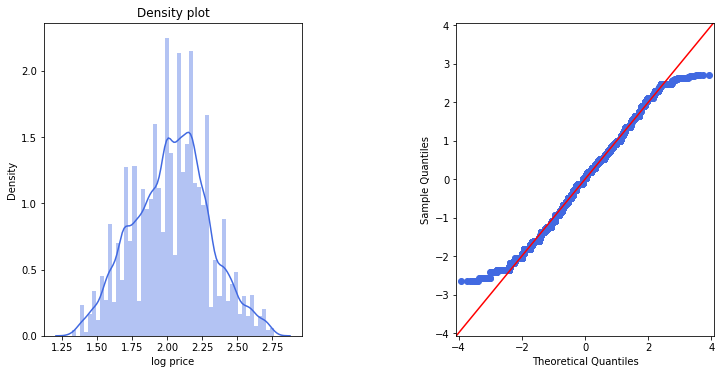

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))
plt.subplots_adjust(wspace=0.6, top=0.85) 

# Density plot
tmp = airbnb_prepro_df_wo_out.loc[airbnb_prepro_df_wo_out.Air_price > 0, 'Air_price']
sns.distplot(np.log10(tmp), ax=axes[0], color=col1)
axes[0].set_title("Density plot")
axes[0].set_ylabel("Density")
axes[0].set_xlabel("log price")

# QQ plot
tmp = airbnb_prepro_df_wo_out.loc[airbnb_prepro_df_wo_out.Air_price > 0, 'Air_price']
tmp = np.log10(tmp)
stdized = (tmp - np.mean(tmp)) / np.std(tmp)
sm.qqplot(stdized, line='45', ax=axes[1], color=col1);

*Categorical variables*

For the categorical variables we first take a look at the number of different categories and then at the number of observations of the smallest and largest category. We observe that some categories are not much populated and may have to be regrouped with other categories in a later step.

In [25]:
# modified
columns = ['Air_' + el for el in airbnb_categorical]
columns;
airbnb_prepro_df.loc[:, columns].apply(lambda x: len(x.unique()))

Air_host_is_superhost                     3
Air_host_neighbourhood                  115
Air_host_has_profile_pic                  3
Air_host_identity_verified                3
Air_street                              639
Air_neighbourhood                        60
Air_neighbourhood_cleansed               30
Air_city                                572
Air_state                                28
Air_zipcode                             253
Air_smart_location                      572
Air_is_location_exact                     2
Air_property_type                        35
Air_room_type                             3
Air_bed_type                              5
Air_instant_bookable                      2
Air_cancellation_policy                   6
Air_require_guest_profile_picture         2
Air_require_guest_phone_verification      2
dtype: int64

These are the numbers of observations for the least populated categories ...

In [26]:
airbnb_prepro_df.loc[:, columns].apply(lambda x: min(pd.value_counts(x)))

Air_host_is_superhost                    5373
Air_host_neighbourhood                      1
Air_host_has_profile_pic                   46
Air_host_identity_verified               8571
Air_street                                  1
Air_neighbourhood                          18
Air_neighbourhood_cleansed                 88
Air_city                                    1
Air_state                                   1
Air_zipcode                                 1
Air_smart_location                          1
Air_is_location_exact                    5647
Air_property_type                           1
Air_room_type                             400
Air_bed_type                                9
Air_instant_bookable                    10854
Air_cancellation_policy                     1
Air_require_guest_profile_picture         266
Air_require_guest_phone_verification      323
dtype: int64

... and these the numbers for the most populated categories. 

In [27]:
airbnb_prepro_df.loc[:, columns].apply(lambda x: max(pd.value_counts(x)))

Air_host_is_superhost                   17519
Air_host_neighbourhood                   3537
Air_host_has_profile_pic                22846
Air_host_identity_verified              14321
Air_street                               4221
Air_neighbourhood                        3726
Air_neighbourhood_cleansed               7368
Air_city                                 4237
Air_state                               21858
Air_zipcode                              3367
Air_smart_location                       4237
Air_is_location_exact                   17248
Air_property_type                       12469
Air_room_type                           14379
Air_bed_type                            22730
Air_instant_bookable                    12041
Air_cancellation_policy                  9282
Air_require_guest_profile_picture       22629
Air_require_guest_phone_verification    22572
dtype: int64

**IV. Implementation**

In this section the discussed adaptions are implemented. We first get rid of the implausible values, i.e. observations with an airbnb price of zero and observations where the price for one night is higher than the price for several nights.

In [28]:
airbnb_cleaned_df = airbnb_prepro_df.loc[(airbnb_prepro_df.Air_price != 0) &
                                          ~airbnb_prepro_df.index.isin(impl_obs.index), :]
airbnb_cleaned_df.shape

(22867, 97)

Next, the dataset is restricted to observations with a non-outlier log-price.

In [29]:
# modified
airbnb_cleaned_df['Air_log_price'] = np.log10(airbnb_cleaned_df.Air_price)
airbnb_cleaned_df['Air_log_price_per_acc'] = airbnb_cleaned_df.Air_log_price / airbnb_cleaned_df.Air_accommodates
airbnb_cleaned_df['Air_log_price_per_bedroom'] = airbnb_cleaned_df.Air_log_price / airbnb_cleaned_df.Air_bedrooms
airbnb_cleaned_df = airbnb_cleaned_df.loc[(airbnb_cleaned_df.Air_log_price >= lower_bounds.iloc[25]) & 
                                                     (airbnb_cleaned_df.Air_log_price <= upper_bounds.iloc[25]),:]
airbnb_cleaned_df.shape # (22331, 100)

(22331, 100)

**Spatial distribution of the prices**

To finish, the log-transformed airbnb prices per accommodate and per bedroom are plotted on a longitude-latitude grid. Accommodations that are located near the center (CBD) are more expensive than those that are in the periphery. The data is sorted in increasing order so that the observations with the highest prices were plotted on top.

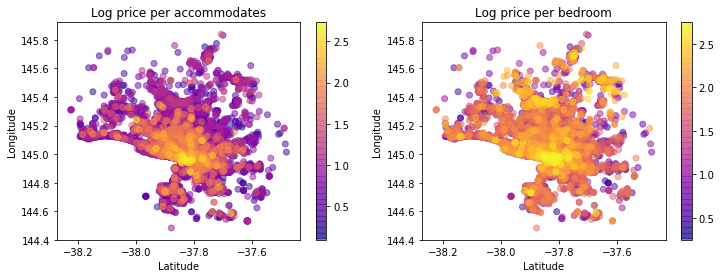

In [30]:
# modified
tmp = airbnb_cleaned_df.sort_values(by='Air_log_price_per_acc')
fig, ax = plt.subplots(1, 2, figsize=(12,4))
im = ax[0].scatter(tmp.Air_latitude, tmp.Air_longitude, 
                   c=tmp.Air_log_price_per_acc, cmap='plasma',
                   alpha=0.5)
fig.colorbar(im, ax=ax[0])
ax[0].set_title("Log price per accommodates")
ax[0].set_ylabel("Longitude")
ax[0].set_xlabel("Latitude")

tmp = airbnb_cleaned_df.sort_values(by='Air_log_price_per_bedroom')
im= ax[1].scatter(tmp.Air_latitude, tmp.Air_longitude, 
                  c=tmp.Air_log_price_per_bedroom, cmap='plasma',
                  alpha=0.5)
fig.colorbar(im, ax=ax[1])
ax[1].set_title("Log price per bedroom")
ax[1].set_ylabel("Longitude")
ax[1].set_xlabel("Latitude");

#### Housing market

The housing market dataset stores information about housess that are sold, going to be sold or are tried to be sold (https://www.kaggle.com/anthonypino/melbourne-housing-market). One goal of this project is to utilize this data to improve the prediction of airbnb prices. The funtion `clean_dataset()` corrects the misspelt variable names concerning the longitude and latitude, appends 'House_' as prefix, converts suburbs names to lower case and casts dates to datetime objects. We start by applying this function on our housing market dataset.

In [31]:
dirname = os.path.abspath('')
filename = os.path.join(dirname, "Housing_market/Melbourne_housing_FULL.csv")

# import the data
housing_df = house.import_data(filename)

# clean dataset
housing_prepro_df = house.prepro_dataset(housing_df)

housing_df.head(1)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0


The dataset contains 34'857 observations.

In [32]:
housing_df.shape # (34857, 21)

(34857, 21)

**I. Variables**

21 variables about house prices, house types, locations and other characteristics of houses are part of the dataset.  

In [33]:
len(housing_df.columns)

21

**Description of the variables**

Again, we first describe the variables that are part of the dataset. The descriptions are gathered from https://www.kaggle.com/anthonypino/melbourne-housing-market. For the later usage of the dataset it is worth noting that transaction for which realized prices are available are labeled as 'S', 'SP' and 'SA'.

**Suburb:** the suburb. <br>
**Address:** the address. <br>
**Rooms:** the number of rooms. <br>
**Price:** the price in (AUS) dollars. <br>
**Method:** S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available. <br>
**Type:** h - house, cottage, villa, semi, terrace; u - unit, duplex; t - townhouse. <br>
**SellerG:** the real estate agent. <br>
**Date:** the date sold. <br>
**Distance:** the distance from CBD in kilometers. <br>
**Regionname:** the general region (West, North West, North, North east ...etc). <br>
**Propertycount:** the number of properties that exist in the suburb. <br>
**Bedroom2:** scraped # of bedrooms (from different source). <br>
**Bathroom:** the number of bathrooms. <br>
**Car:** the number of carspots. <br>
**Landsize:** the land size in square metres. <br>
**BuildingArea:** the building size in square metres. <br>
**YearBuilt:** the year the house was built. <br>
**CouncilArea:** the governing council for the area. <br>
**Lattitude:** the latitude. <br>
**Longtitude:** the longitude.

**Numerical and categorical variables**

Variables are classified as numerical or categorical. As in the case of the airbnb dataset dates are interpreted as numerical values. 

**numerical**: Rooms, Price, Date, Distance, Propertycount, Bedroom2, Bathroom, Car, Landsize, BuildingArea, YearBuilt, Lattitude (sic!), Longtitude (sic!).

**categorical**: Suburb, Address, Method, Type, SellerG, Regionname, CouncilArea

In [34]:
housing_numeric = ['rooms', 'price', 'date', 'distance', 'propertycount', 'bedroom2', 'bathroom', 'car',
                  'landsize', 'buildingarea', 'yearbuilt', 'latitude', 'longitude']
housing_categorical = ['suburb', 'address', 'method', 'type', 'sellerg', 'regionname', 'councilarea']

**II. Distribtuion**

**Ranges of the numerical data**

Again, we take a look at the ranges of the continuous variables.

In [35]:
columns = ['House_' + col_name for col_name in housing_numeric]
housing_range = pd.concat([housing_prepro_df.loc[:, columns].apply(np.min, axis=0),
                          housing_prepro_df.loc[:, columns].apply(np.max, axis=0)], axis=1)
housing_range.columns = ['min', 'max']
housing_range

,min,max
House_rooms,1,16
House_price,85000,1.12e+07
House_date,2016-01-28 00:00:00,2018-03-17 00:00:00
House_distance,0,48.1
House_propertycount,83,21650
House_bedroom2,0,30
House_bathroom,0,12
House_car,0,26
House_landsize,0,433014
House_buildingarea,0,44515


**Values of categorical variables**

Now, we take a look at the categorical variables. From the output we can see that there are different house types and different methods how the price of the house is obtained. Most of the homes are of type 'h' (house) and the method is in most cases 'S' (property sold) or 'SP' (property sold prior) which means that the house was sold prior to the auction.

In [36]:
columns = ['House_' + col_name for col_name in housing_categorical]

for name in columns:
    print(name)
    print("-------------------------------------------")
    print(housing_prepro_df.loc[:, name].value_counts())
    print("")

House_suburb
-------------------------------------------
reservoir             844
bentleigh east        583
richmond              552
glen iris             491
preston               485
kew                   467
brighton              456
brunswick             444
south yarra           435
hawthorn              428
northcote             424
camberwell            423
balwyn north          420
essendon              409
coburg                405
glenroy               400
brighton east         393
pascoe vale           378
st kilda              374
port melbourne        371
malvern east          369
prahran               336
thornbury             322
balwyn                319
bentleigh             319
yarraville            304
surrey hills          293
elwood                288
moonee ponds          285
hawthorn east         284
                     ... 
wattle glen             2
plenty                  2
beaconsfield upper      2
healesville             2
lynbrook                2
hurstbr

**Distribution of the airbnb price and other variables**

The distributions of the variables are inspected below.

*Numerical variables (continuous or discrete)*

We plot the distribution of the continuous variables. The variable `landsize` contains many zeros (2'437 observation) and the variable `buildingarea` has some extreme values.

In [37]:
(housing_prepro_df.House_landsize == 0).sum(); # 2437 observations
(housing_prepro_df.House_buildingarea == 0).sum(); # 76
housing_prepro_df.House_buildingarea.max(); # 44515.0
housing_prepro_df.sort_values('House_buildingarea', ascending=False).loc[:, 'House_buildingarea'].head(5)

22632    44515.0
2466      6791.0
33405     6178.0
15003     4645.0
14387     3647.0
Name: House_buildingarea, dtype: float64

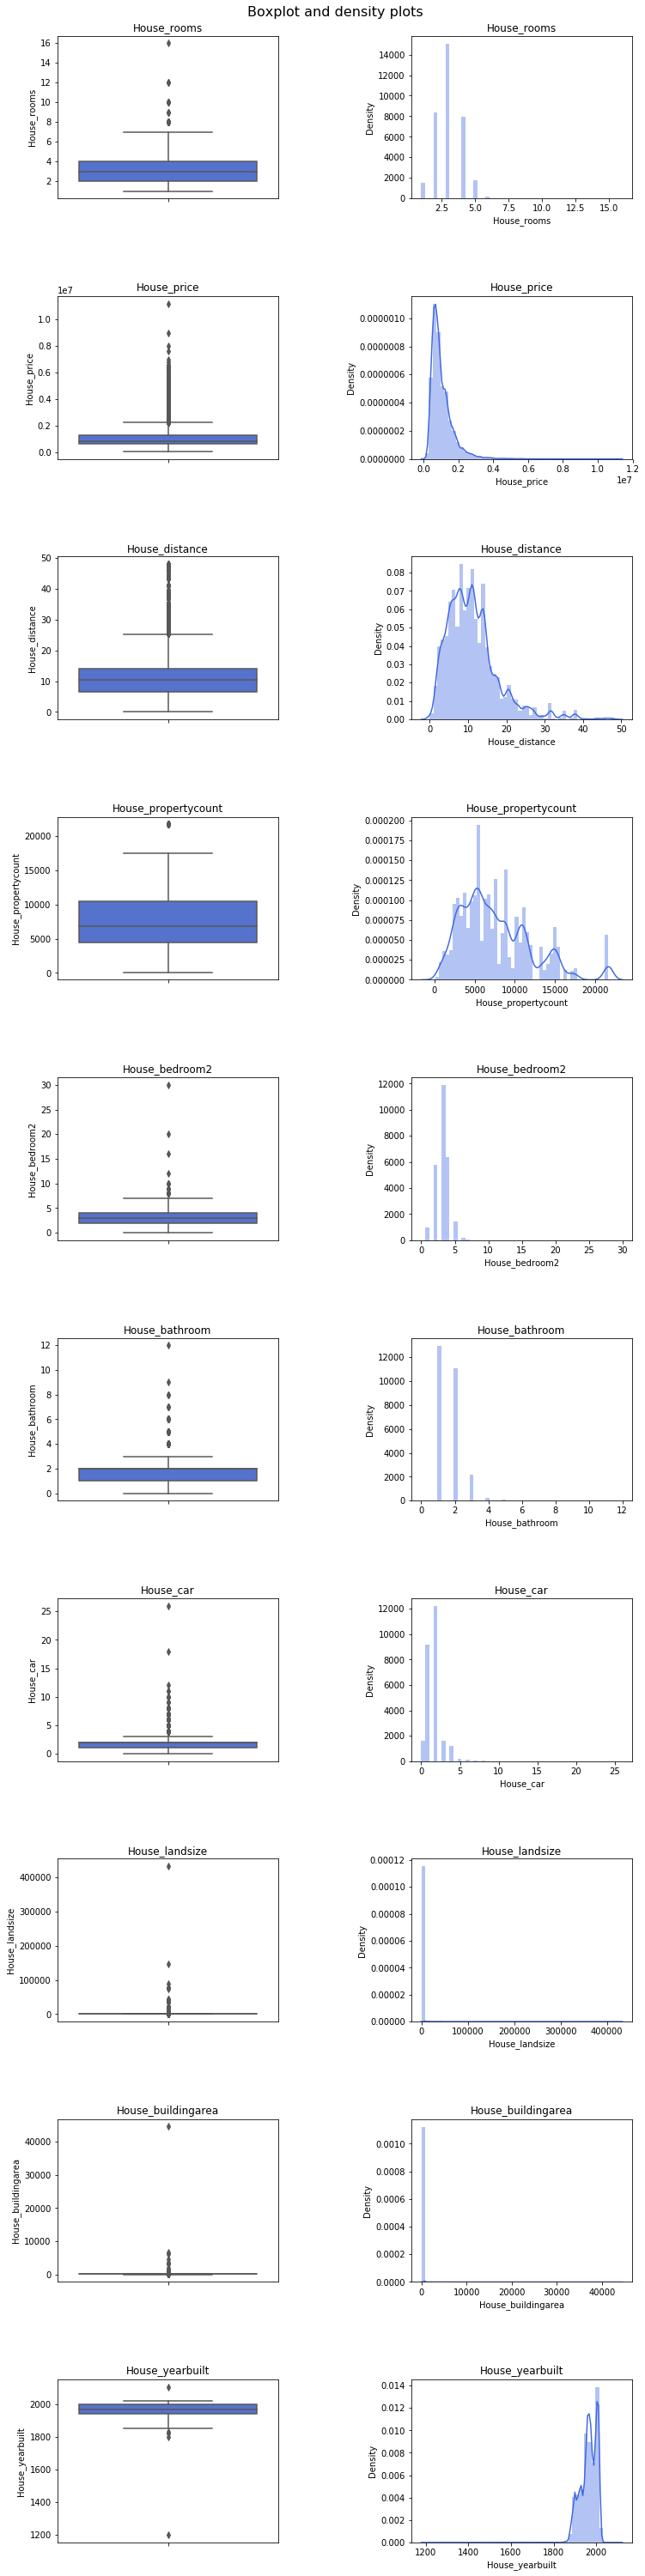

In [38]:
variables = housing_numeric.copy() 
variables = ['House_' + v for v in variables if v not in ('date', 'latitude', 'longitude')]
            
fig, axes = plt.subplots(nrows=len(variables), ncols=2, figsize=(12,48))

# 'top' to position the suptitle (https://stackoverflow.com/questions/8248467/
# matplotlib-tight-layout-doesnt-take-into-account-figure-suptitle)
plt.subplots_adjust(wspace=0.6, hspace=0.6, top=0.97) 
#https://stackoverflow.com/questions/7066121/how-to-set-a-single-main-title-above-all-the-subplots-with-pyplot
fig.suptitle("Boxplot and density plots", fontsize=16)   

for i,var in enumerate(variables):
    
    data = housing_prepro_df.loc[:, var].dropna()
    sns.boxplot(y=data, ax=axes[i,0], color=col1)
    axes[i,0].set_title(var)
    axes[i,0].set_ylabel(var)
    
    if var in ['House_rooms', 'House_bedroom2', 'House_bathroom', 'House_car']:
        plot_kde = False
    else:
        plot_kde = True
    
    sns.distplot(data, ax=axes[i,1], kde=plot_kde, color=col1)
    axes[i,1].set_title(var)
    axes[i,1].set_ylabel("Density")

Again, we get a 'nicer' distribution if the price is log-transformed. After the transformation the log house price is (almost) normally distributed as the quantile-quantile plot shows.

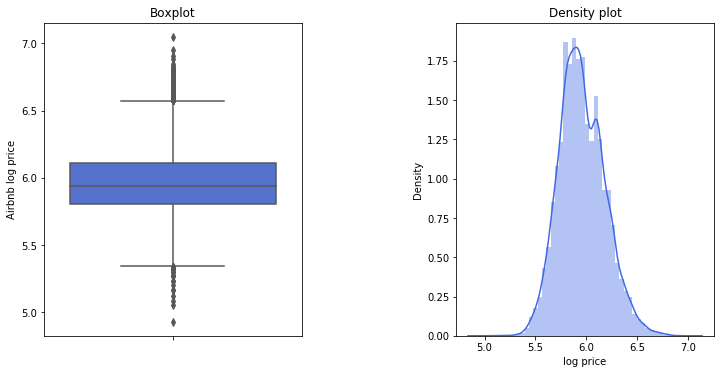

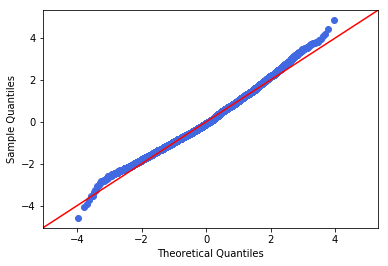

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))
plt.subplots_adjust(wspace=0.6, top=0.85) 

# Boxplot
sns.boxplot(y=np.log10(housing_prepro_df.House_price), ax=axes[0], color=col1)
axes[0].set_title("Boxplot")
axes[0].set_ylabel('Airbnb log price');

# Density plot
tmp = housing_prepro_df.loc[housing_prepro_df.House_price > 0, 'House_price']
sns.distplot(np.log10(tmp), color=col1)
axes[1].set_title("Density plot")
axes[1].set_ylabel("Density")
axes[1].set_xlabel("log price")

# QQ plot
tmp = housing_prepro_df.loc[housing_prepro_df.House_price > 0, 'House_price']
tmp = np.log10(tmp)
stdized = (tmp - np.mean(tmp)) / np.std(tmp)
sm.qqplot(stdized, line='45', color=col1);

*Categorical variables*

As it was already mentionned the method 'S' (property sold) is the most frequent method and most properties are houses ('h').

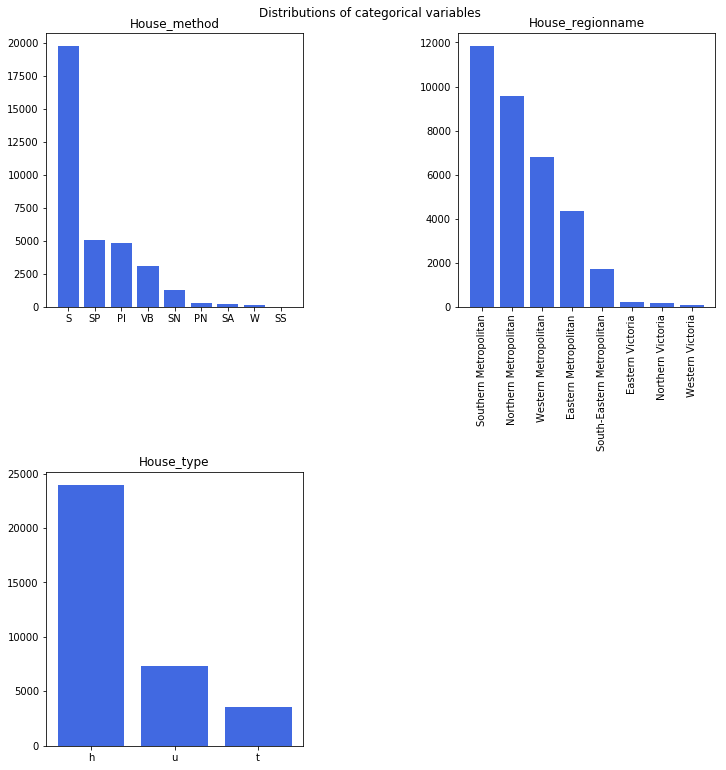

In [40]:
tmp = ['House_method', 'House_type', 'House_regionname']
fig, axes = plt.subplots(int(np.ceil(len(tmp)/2)),2, figsize=(12, 12))
plt.suptitle("Distributions of categorical variables")
plt.subplots_adjust(wspace=0.6, hspace=0.6, top=0.95) 
for i in range(len(tmp)):
    if i < len(tmp)/2:
        # The values are sorted in descending order
        h = housing_prepro_df.loc[:, tmp[i]].value_counts().to_list()
        names = housing_prepro_df.loc[:, tmp[i]].value_counts().index.to_list()
        axes[i,0].bar(x=range(len(h)), height=h, color=col1)
        axes[i,0].set_xticks(range(len(h)))
        if tmp[i] == 'House_regionname':
            r = 90
        else:
            r = 0
        axes[i,0].set_xticklabels(names, rotation=r)
        axes[i,0].set_title(tmp[i])
    else:
        j = i - int(np.ceil(len(tmp)/2))
        # The values are sorted in descending order
        h = housing_prepro_df.loc[:, tmp[i]].value_counts().to_list()
        names = housing_prepro_df.loc[:, tmp[i]].value_counts().index.to_list()
        axes[j,1].bar(x=range(len(h)), height=h, color=col1)
        axes[j,1].set_xticks(range(len(h)))
        if tmp[i] == 'House_regionname':
            r = 90
        else:
            r = 0
        axes[j,1].set_xticklabels(names, rotation=r)
        axes[j,1].set_title(tmp[i])
axes[1,1].remove()

**III. Cleaning**

**Missing Values**

The property price - the most important variable of this dataset with respect to our project - is missing for 7'610 observations. `bathroom` and `bedroom2`, which define the size of an accommodation, is missing for 8'226 and 8'217 observations respectively.

In [41]:
columns = ['House_' + el for el in housing_numeric + housing_categorical]
    
housing_sorted_missing = housing_prepro_df.loc[:, columns].isnull().sum().sort_values(ascending=True)
housing_sorted_missing

House_rooms                0
House_sellerg              0
House_date                 0
House_type                 0
House_method               0
House_address              0
House_suburb               0
House_distance             1
House_regionname           3
House_councilarea          3
House_propertycount        3
House_price             7610
House_latitude          7976
House_longitude         7976
House_bedroom2          8217
House_bathroom          8226
House_car               8728
House_landsize         11810
House_yearbuilt        19306
House_buildingarea     21115
dtype: int64

Next, we take a look at the missing values for the different methods. The methods 'S', 'SP' and 'SA' are realized prices. Some missing values can be observed for these types.

In [42]:
a = pd.DataFrame({'nobs': housing_prepro_df.loc[:, ['House_method']].groupby('House_method').size()})
a = a.reset_index()
a
b = housing_prepro_df.loc[:, ['House_method', 'House_price']].groupby('House_method').agg('count')
b = b.reset_index()
b.rename(columns={'House_price': 'non_missing_nobs'}, inplace=True)
obs_by_method = a.merge(b, left_on='House_method', right_on='House_method', how='inner')
obs_by_method

,House_method,nobs,non_missing_nobs
0,PI,4850,3255
1,PN,308,0
2,S,19744,17515
3,SA,226,190
4,SN,1317,0
5,SP,5095,3603
6,SS,36,0
7,VB,3108,2684
8,W,173,0


**Implausible values**

All prices are strictly positive and thus plausible. However, implausible values are observed for `yearbuilt` which takes also the values 1196, 2019 and 2106. These values are removed later.

In [43]:
# price
(housing_prepro_df.House_price <= 0).sum(); # 0 observations

# yearbuilt
(housing_prepro_df.House_yearbuilt == 2019).sum()
housing_prepro_df.House_yearbuilt.max(); # 2106
housing_prepro_df.House_yearbuilt.min() # 1196
nsmallest(2, housing_prepro_df.House_yearbuilt.dropna()) # [1196.0, 1800.0]

[1196.0, 1800.0]

**Outliers**

Next, we take a look at outliers.

*Numerical variables (continuous or discrete)*

The dataset `housing_prepro_df_wo_out` is cleaned from outliers.

In [44]:
variables = housing_numeric.copy() 
variables = ['House_' + v for v in variables if v not in ('latitude', 'longitude')]

tmp = housing_prepro_df.loc[:, variables]

tmp['House_log_price'] = np.log10(tmp.House_price)
tmp.drop(columns='House_price', inplace=True)
quantiles = tmp.quantile([.25, .75])
iqr = quantiles.iloc[1, :] - quantiles.iloc[0, :]
upper_bounds = quantiles.iloc[1, :] + 1.5*iqr
lower_bounds = quantiles.iloc[0, :] - 1.5*iqr
upper_bounds

housing_prepro_df_wo_out = tmp.loc[(tmp.House_rooms >= lower_bounds.iloc[0]) & (tmp.House_rooms <= upper_bounds.iloc[0]) & 
                                  (tmp.House_distance >= lower_bounds.iloc[1]) & (tmp.House_distance <= upper_bounds.iloc[1]) &
                                  (tmp.House_propertycount >= lower_bounds.iloc[2]) & (tmp.House_propertycount <= upper_bounds.iloc[2]) &
                                  (tmp.House_bedroom2 >= lower_bounds.iloc[3]) & (tmp.House_bedroom2 <= upper_bounds.iloc[3]) &
                                  (tmp.House_bathroom >= lower_bounds.iloc[4]) & (tmp.House_bathroom <= upper_bounds.iloc[4]) &
                                  (tmp.House_car >= lower_bounds.iloc[5]) & (tmp.House_car <= upper_bounds.iloc[5]) &
                                  (tmp.House_landsize >= lower_bounds.iloc[6]) & (tmp.House_landsize <= upper_bounds.iloc[6]) &
                                  (tmp.House_buildingarea >= lower_bounds.iloc[7]) & (tmp.House_buildingarea <= upper_bounds.iloc[7]) &
                                  (tmp.House_yearbuilt >= lower_bounds.iloc[8]) & (tmp.House_yearbuilt <= upper_bounds.iloc[8]) &
                                  (tmp.House_log_price >= lower_bounds.iloc[9]) & (tmp.House_log_price <= upper_bounds.iloc[9]), :]
                                  
housing_prepro_df_wo_out.head(5)

,House_rooms,House_date,House_distance,House_propertycount,House_bedroom2,House_bathroom,House_car,House_landsize,House_buildingarea,House_yearbuilt,House_log_price
2,2,2016-02-04,2.5,4019.0,2.0,1.0,0.0,156.0,79.0,1900.0,6.014940
4,3,2017-03-04,2.5,4019.0,3.0,2.0,0.0,134.0,150.0,1900.0,6.165838
6,4,2016-06-04,2.5,4019.0,3.0,1.0,2.0,120.0,142.0,2014.0,6.204120
11,3,2016-05-07,2.5,4019.0,4.0,2.0,0.0,245.0,210.0,1910.0,6.273233
14,2,2016-10-08,2.5,4019.0,2.0,1.0,2.0,256.0,107.0,1890.0,6.213783


Removing the outliers would result in a dataset of 27'033 observations.

In [45]:
housing_prepro_df_wo_out.shape # (27033, 21)
housing_prepro_df_wo_out_tmp = housing_prepro_df.loc[(tmp.House_log_price >= lower_bounds.iloc[9]) & (tmp.House_log_price <= upper_bounds.iloc[9]),:]
housing_prepro_df_wo_out_tmp.shape # (27033, 21)

(27033, 21)

*Categorical variables*

Some categories of the categorical variables do not contain a lot of observations.

In [46]:
columns = ['House_' + el for el in housing_categorical]
columns;
housing_prepro_df.loc[:, columns].apply(lambda x: len(x.unique()))

House_suburb           349
House_address        34009
House_method             9
House_type               3
House_sellerg          388
House_regionname         9
House_councilarea       34
dtype: int64

The numbers of observations for the least populated categories are shown below ...

In [47]:
housing_prepro_df.loc[:, columns].apply(lambda x: min(pd.value_counts(x)))

House_suburb            1
House_address           1
House_method           36
House_type           3580
House_sellerg           1
House_regionname      115
House_councilarea       7
dtype: int64

... and also for the maximum populated. 

In [48]:
housing_prepro_df.loc[:, columns].apply(lambda x: max(pd.value_counts(x)))

House_suburb           844
House_address            6
House_method         19744
House_type           23980
House_sellerg         3359
House_regionname     11836
House_councilarea     3675
dtype: int64

**IV. Implementation**

The dataset is restricted to the methods 'S', 'SP', 'SA' because only these prices are realized. 25'065 observations are left.

In [49]:
housing_cleaned_df = housing_prepro_df.loc[housing_prepro_df.House_method.isin(['S', 'SP', 'SA']),:]
housing_cleaned_df.shape # (25065, 21)

(25065, 21)

Implausible values are deleted.

In [50]:
# deleting the two observations
housing_cleaned_df = housing_cleaned_df.loc[(housing_cleaned_df.House_yearbuilt <= 2018) & 
                                            (housing_cleaned_df.House_yearbuilt != 1196), :]
housing_cleaned_df.shape; # (15548, 21)

The price is log-transformed and outliers of log-prices are deleted. 

In [51]:
housing_cleaned_df['House_log_price'] = np.log10(housing_cleaned_df.House_price)
housing_cleaned_df['House_log_price_per_room'] = housing_cleaned_df.House_log_price / housing_cleaned_df.House_rooms
housing_cleaned_df = housing_cleaned_df.loc[(housing_cleaned_df.House_log_price >= lower_bounds.iloc[9]) & 
                                           (housing_cleaned_df.House_log_price <= upper_bounds.iloc[9]),:]
housing_cleaned_df.shape # (9386, 23)

(9386, 23)

Finally, the spatial distribution of the log house price per room is plotted. Again, we observe that houses that are located nearby the CBD are more expensive. Again, the most expensive accommodations are plotted on top.

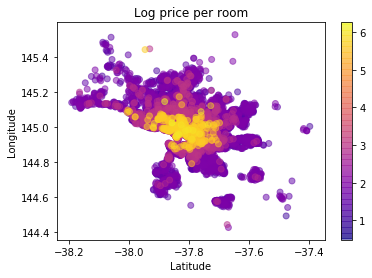

In [52]:
# modified
tmp = housing_cleaned_df.sort_values(by='House_log_price_per_room')
fig, ax = plt.subplots(figsize=(6,4))
im = ax.scatter(tmp.House_latitude, tmp.House_longitude, 
                c=tmp.House_log_price /tmp.House_rooms, 
                cmap='plasma', alpha=0.5)

fig.colorbar(im, ax=ax)
ax.set_title("Log price per room")
ax.set_ylabel("Longitude")
ax.set_xlabel("Latitude");

#### Crime data

The last dataset of interest is a dataset about crimes. It stores
information about crimes in Melbourne (https://www.crimestatistics.vic.gov.au/crime-statisticshistorical-crime-datayear-ending-31-december-2018/recorded-criminal-incidents). We inspect this dataset because crimes rates might be related to prevalence of airbnb accommodates.

In [53]:
dirname = os.path.abspath('')
filename = os.path.join(dirname, 'Crimes/Data_tables_Criminal_Incidents_Visualisation_year_ending_December_2018.xlsx')
sheet = 'T05-06 and T12-13'

crime_df = crime.import_data(filename, sheet)
crime_df.head(1)

,Year ending December,Police Service Area,Local Government Area,Offence Division,Offence Subdivision,Offence Subgroup,Incidents Recorded,"PSA Rate per 100,000 population","LGA Rate per 100,000 population"
0,2009,BALLARAT,BALLARAT,A Crimes against the person,A10 Homicide and related offences,A10 Homicide and related offences,2,2.038507,2.188423


Next, the dataset is preprocessed. Particularly, the column names are changed and the values of the police service area and the local government area are converted to lowercase.

In [54]:
# modified
crime_prepro_df = crime.prepro_dataset(crime_df)
crime_prepro_df.head(1)

,Crime_year_ending_december,Crime_police_service_area,Crime_local_government_area,Crime_offence_division,Crime_offence_subdivision,Crime_offence_subgroup,Crime_incidents_recorded,Crime_psa_rate_per_100000_population,Crime_lga_rate_per_100000_population
0,2009,ballarat,ballarat,A Crimes against the person,A10 Homicide and related offences,A10 Homicide and related offences,2,2.038507,2.188423


In [55]:
# modified
crime_prepro_df.dtypes

Crime_year_ending_december                int64
Crime_police_service_area                object
Crime_local_government_area              object
Crime_offence_division                   object
Crime_offence_subdivision                object
Crime_offence_subgroup                   object
Crime_incidents_recorded                  int64
Crime_psa_rate_per_100000_population    float64
Crime_lga_rate_per_100000_population    float64
dtype: object

**I. Variables**

The dataset has 9 variables. A description of the variables is provided below.

In [56]:
len(crime_df.columns)

9

**Year ending December:** The year. 2009 - 2018 <br>
**Police Service Area:** The police service area: BALLARAT, BANYULE ...<br>
**Local Government Area:** The government area: BALLARANT, BANYULE ... <br>
**Offence Division:** Offence division: A Crimes against the person, B Property and deception offences,
    C Drug offences, D Public order and security offences, E Justice procedures offences, F Other offences. <br>
**Offence Subdivision:** Offence subdivision: A10 Homicide and related offences, A20 Homicide and related offences ... <br>
**Offence Subgroup:** Offence subgroup: A10 Homicide and related offences, A232 Non-FV Common assault ... <br>
**Incidents Recorded:** Number of incidents recorded: 2, 4, 6, ... <br>
**PSA Rate per 100,000 population:** Incidents per Police Service Area <br>
**LGA Rate per 100,000 population:** Incidents per Local Government Area <br>

**Numerical and categorical variables**

Next, variables to numerical and which are categorical are defined.

In [57]:
crime_numeric = ['Crime_year_ending_december', 'Crime_incidents_recorded', 'Crime_psa_rate_per_100000_population',
                'Crime_lga_rate_per_100000_population']
crime_categorical = ['Crime_police_service_area', 'Crime_local_government_area', 'Crime_offence_division',
                    'Crime_offence_subdivision', 'Crime_offence_subgroup']

In [58]:
crime_df.dtypes

Year ending December                 int64
Police Service Area                 object
Local Government Area               object
Offence Division                    object
Offence Subdivision                 object
Offence Subgroup                    object
Incidents Recorded                   int64
PSA Rate per 100,000 population    float64
LGA Rate per 100,000 population    float64
dtype: object

**II. Distribution**

In this section the range and distribution of the crime variables are inspected.

**Ranges of the numerical data**

We start by looking at the ranges of the numerical variables.

In [59]:
columns = crime_numeric.copy()
crime_range = pd.concat([crime_prepro_df.loc[:, columns].apply(np.min, axis=0),
                         crime_prepro_df.loc[:, columns].apply(np.max, axis=0)], axis=1)
crime_range.columns = ['min', 'max']
crime_range

,min,max
Crime_year_ending_december,2009.000000,2018.000000
Crime_incidents_recorded,1.000000,5260.000000
Crime_psa_rate_per_100000_population,0.293385,5581.079504
Crime_lga_rate_per_100000_population,0.293385,5581.079504


**Values of categorical variables**

The number of observations for the different categories are printed below.

In [60]:
columns = [col_name for col_name in crime_categorical]

for name in columns:
    print(name)
    print("-------------------------------------------")
    print(crime_prepro_df.loc[:, name].value_counts())
    print("")

Crime_police_service_area
-------------------------------------------
wangaratta              1668
warrnambool             1609
northern grampians      1549
benalla                 1521
moorabool               1515
swan hill               1478
wodonga                 1455
glen eira               1348
horsham                 1288
bass coast              1215
macedon ranges          1210
southern grampians      1155
ballarat                1148
mitchell                1136
surf coast              1101
geelong                 1033
central goldfields       979
melbourne                885
hume                     825
greater dandenong        823
casey                    816
brimbank                 796
kingston                 792
frankston                786
whittlesea               782
darebin                  778
port phillip             774
wyndham                  773
knox                     770
latrobe                  770
mornington peninsula     769
moreland                 763
ya

**Distribution of variables**

Next, we take a look at the distribution of the variables.

*Numerical variables (continuous or discrete)*

The number of observations are evenly distributed for the years 2009 - 2018. The variables `Crime_incidents_recorded`, `Crime_psa_rate_per_100000_population` and `Crime_lga_rate_per_100000_population` are skewed to the right.

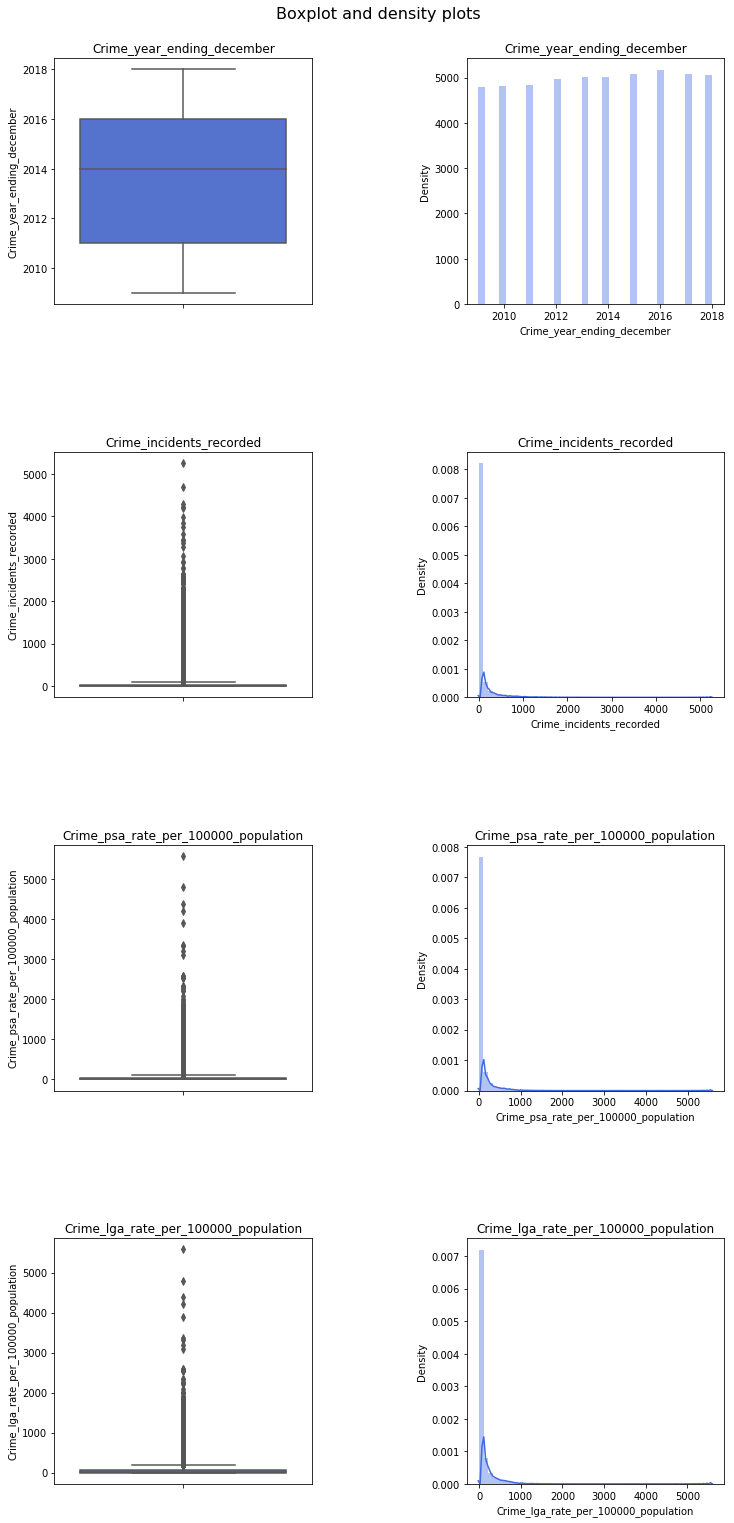

In [61]:
variables = crime_numeric.copy() 
# variables = [v for v in variables if v not in ('date', 'latitude', 'longitude')]
            
fig, axes = plt.subplots(nrows=len(variables), ncols=2, figsize=(12,24))

# 'top' to position the suptitle (https://stackoverflow.com/questions/8248467/
# matplotlib-tight-layout-doesnt-take-into-account-figure-suptitle)
plt.subplots_adjust(wspace=0.6, hspace=0.6, top=0.95) 
#https://stackoverflow.com/questions/7066121/how-to-set-a-single-main-title-above-all-the-subplots-with-pyplot
fig.suptitle("Boxplot and density plots", fontsize=16)   

for i,var in enumerate(variables):
    
    data = crime_prepro_df.loc[:, var].dropna()
    if var == 'Crime_year_ending_december':
        plot_kde = False
    else:
        plot_kde = True
    
    sns.boxplot(y=data, ax=axes[i,0], color=col1)
    axes[i,0].set_title(var)
    axes[i,0].set_ylabel(var)
    
    sns.distplot(data, ax=axes[i,1], kde=plot_kde, color=col1)
    axes[i,1].set_title(var)
    axes[i,1].set_ylabel("Density")

*Categorical variables*

No plots are provided in this section since all the categorical values contain too many categories.

**III. Cleaning**

Now, it is inspected whether there are missing or implausible values, or outliers.

**Missing values**

There are no missing values.

In [62]:
columns = crime_numeric + crime_categorical
    
crime_sorted_missing = crime_prepro_df.loc[:, columns].isnull().sum().sort_values(ascending=True)
crime_sorted_missing

Crime_year_ending_december              0
Crime_incidents_recorded                0
Crime_psa_rate_per_100000_population    0
Crime_lga_rate_per_100000_population    0
Crime_police_service_area               0
Crime_local_government_area             0
Crime_offence_division                  0
Crime_offence_subdivision               0
Crime_offence_subgroup                  0
dtype: int64

**Implausible values**

The entries of `Crime_psa_rate_per_100000_population` and `Crime_lga_rate_per_100000_population` are lying between (0.29, 5581.1) and thus substantially below 100'000 as expected. The number of crimes reported (`Crime_incidents_recorded`) is always greater than zero. No implausible values are observed.

In [63]:
(crime_prepro_df.Crime_psa_rate_per_100000_population.min(), crime_prepro_df.Crime_psa_rate_per_100000_population.max())

(0.2933846120844113, 5581.079503856887)

In [64]:
(crime_prepro_df.Crime_psa_rate_per_100000_population < 0).sum() # 0
(crime_prepro_df.Crime_lga_rate_per_100000_population < 0).sum() # 0
(crime_prepro_df.Crime_incidents_recorded < 0).sum() # 0

0

**Outliers**

Outliers are removed.

*Numerical variables (continuous or discrete)*

In [65]:
variables = ['Crime_psa_rate_per_100000_population', 
            'Crime_lga_rate_per_100000_population',
            'Crime_incidents_recorded']

tmp = crime_prepro_df.loc[:, variables]

quantiles = tmp.quantile([.25, .75])
iqr = quantiles.iloc[1, :] - quantiles.iloc[0, :]
upper_bounds = quantiles.iloc[1, :] + 1.5*iqr
lower_bounds = quantiles.iloc[0, :] - 1.5*iqr
upper_bounds

crime_prepro_df_wo_out = tmp.loc[(tmp.Crime_psa_rate_per_100000_population >= lower_bounds.iloc[0]) & (tmp.Crime_psa_rate_per_100000_population <= upper_bounds.iloc[0]) & 
                                (tmp.Crime_lga_rate_per_100000_population >= lower_bounds.iloc[1]) & (tmp.Crime_lga_rate_per_100000_population <= upper_bounds.iloc[1]) &
                                (tmp.Crime_incidents_recorded >= lower_bounds.iloc[2]) & (tmp.Crime_incidents_recorded <= upper_bounds.iloc[2]), :]
                                  
crime_prepro_df_wo_out.head(5)

,Crime_psa_rate_per_100000_population,Crime_lga_rate_per_100000_population,Crime_incidents_recorded
0,2.038507,2.188423,2
1,3.272037,3.272037,4
2,3.605943,7.002556,2
3,4.936321,4.936321,2
4,5.730331,14.979029,2


The original dataset contains 49'828 observations. After removing the outliers of all the three variables the dataset has 40'283 observations and if we remove only the outliers of `crime_lga_rate_per_100000_population` we end up with 43'560 observations. 

In [66]:
crime_prepro_df.shape # (49828, 9)
crime_prepro_df_wo_out.shape # (40283, 3)
crime_prepro_df_wo_out_tmp = crime_prepro_df.loc[(tmp.Crime_lga_rate_per_100000_population >= lower_bounds.iloc[1]) & (tmp.Crime_lga_rate_per_100000_population <= upper_bounds.iloc[1]),:]
crime_prepro_df_wo_out_tmp.shape; # (43560, 9)

*Categorical variables*

Next, we take a look at the categorical variables.

In [67]:
columns = crime_categorical.copy()
crime_prepro_df.loc[:, columns].apply(lambda x: len(x.unique()))

Crime_police_service_area       54
Crime_local_government_area     79
Crime_offence_division           6
Crime_offence_subdivision       28
Crime_offence_subgroup         112
dtype: int64

In [68]:
crime_prepro_df.loc[:, columns].apply(lambda x: min(pd.value_counts(x)))

Crime_police_service_area       588
Crime_local_government_area     224
Crime_offence_division         3562
Crime_offence_subdivision        64
Crime_offence_subgroup            1
dtype: int64

In [69]:
crime_prepro_df.loc[:, columns].apply(lambda x: max(pd.value_counts(x)))

Crime_police_service_area       1668
Crime_local_government_area      885
Crime_offence_division         14724
Crime_offence_subdivision       4892
Crime_offence_subgroup           790
dtype: int64

**IV. Implementation**

The outliers in the variable `Crime_lga_per_100000_population` are deleted.

In [70]:
crime_cleaned_df = crime_prepro_df.loc[(tmp.Crime_lga_rate_per_100000_population >= lower_bounds.iloc[1]) & (tmp.Crime_lga_rate_per_100000_population <= upper_bounds.iloc[1]),:]

#### Sights data (not covered)

It might be the case that the distance to sights has an effect on airbnb prices. Sights in Melbourne can be found e.g. on https://www.planetware.com/tourist-attractions-/melbourne-aus-vic-m.htm. However, it's difficult to collect many sights and most of the sights are located near the center of Melbourne so that the distance to site is not included in the analysis. <br>

- Federation Square: -37.817798 144.968714 (latitude.to)
- Royal Botanic Gardens: -37.8334 144.98033 (latitude.to)
- Melbourne Cricket Ground and the National Sports Museum: -37.818663392 144.9833294 (latitude.to)
- Southbank and Arts Centre Melbourne: -37.818830058 144.967662796 (latitude.to)
- National Gallery of Victoria: -37.809811, 144.965195 (latlong.net)
- Eureka Tower: -37.819663388 144.958662832 (latitude.to)
- Arcades and Laneways / Royal Arcade: -37.8145 144.9641 (latitude.to)
- Melbourne Museum and Royal Exhibition Building: -37.803337 144.971445 (latitude.to)
- Parliament House: -37.811055 144.97329 (latitude.to)
- Old Treasury Building: -37.813153 144.974121 (latitude.to)
- Princess Theatre: -37.810725 144.972169 (latitude.to)
- Windsor Hotel: -37.854 144.988 (latitude.to)
- Melbourne Zoo: -37.784762 144.952095 (latitude.to)
- Captain Cook's Cottage, Fitzroy Gardens: -37.8086900986 144.9749511 (latitude.to)
- Yarra River Cruise / Birrarung Marr: -37.817663396 144.970162786 (latitude.to)
- Melbourne Cricket Ground: -37.818663392 144.9833294 (latitude.to)
- National Tennis Centre: -37.819663388 144.973662772 (latitude.to)
- Alexandra Gardens: -37.82037 144.971938 (latitude.to)
- Melbourne Star: -37.8110723 144.9368763 (latitude.to)
- Etihad Stadium: -37.809830094 144.941829566 (latitude.to)
- Queen Victora Market: -37.806966 144.956693 (latitude.to)
- Immigration Museum: -37.8191403 144.9603969 (latitude.to)

- The City of Melbourne (CBD): -37.814 144.963 (wikipedia.org)